# Data complexity measures

This is a short report for a mini-project on data complexity measures, particularly F1 and F2 measures. All functions for computing metrics values within created repository provide common function signature by following proposed prototype:
```python
def prototype(features: pd.DataFrame, target: pd.DataFrame, *args, **kwargs) -> float:
    metric: float = ...
    return metric
```

Measure F1 has been implemented by Anna Przybyłowska and Witold Taisner.
Measure F2 has been implemented by Konrad Szewczyk and Jacek Karolczak.

Source code is available publicly, under MIT license on github - [https://github.com/jkarolczak/data-complexity-measures](https://github.com/jkarolczak/data-complexity-measures).

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris, load_wine, make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from data_complexity import f1, f2

In [39]:
import warnings

warnings.simplefilter('ignore')

We evaluate each dataset in the same way. Therefore, we declare a function for the task of evaluation. To make the interpretation easier not only F1 and F2 measures are computed but also KNN classifier accuracy (trained on 70% and evaluated on remaining 30% of a dataset).

We've also set the random state to the constant value, so that our results are easily reproducible by others.

Such an approach allows an intuitive proof that f1 and f2 measures indeed work. It is to be expected, that datasets, on which KNN achieves lower accuracy score, will have higher f1 and f2 measures. There is a simple explanation standing behind this: if instances of classes overlap, it is more difficult for the classifier to distinguish them, hence lower accuracy. At the same time, aforementioned measures are higher, as the data is more complex.

In [40]:
def evaluate(X: pd.DataFrame, y: pd.DataFrame) -> None:
    print(f'F1 measure: {f1(X, y):.4e}')
    print(f'F2 measure: {f2(X, y):.4e}')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
    knn = KNeighborsClassifier().fit(X_train, y_train)
    print(f'\nKNN classifier accuracy: {knn.score(X_test, y_test):.4f}')

## Toy datasets
In the following section we show off implementations using well-known datasets that can be imported using [scikit-learn](https://scikit-learn.org/stable/about.html) Python library. These datasets are toy examples and thus both f1 and f2 measures are quite low for both datasets - [iris](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) and [wine](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset). However, there are three possible classes in both datasets as well. Thus, this is good proof that our implementations work for binary problems and for multiclass ones as well.

#### Iris dataset

In [41]:
X, y = load_iris(as_frame=True, return_X_y=True)
y = y.to_frame()

evaluate(X, y)

F1 measure: 5.8628e-02
F2 measure: 6.3818e-03

KNN classifier accuracy: 0.9714


#### Wine dataset

In [42]:
X, y = load_wine(as_frame=True, return_X_y=True)
y = y.to_frame()

evaluate(X, y)

F1 measure: 2.7222e-01
F2 measure: 2.0354e-05

KNN classifier accuracy: 0.6640


## Artificial data
In order to prove that our algorithms work properly we construct artificial datasets by creating instances by adding some noise to defined centres. In each iteration centers are closer to each other and thus the overlapping region increases. For the sake of reliability we start with completely separable classes and finish with ones with the same center (where differences are only due to the noise assigned to each sample).

Both measures, F1 and F2, should increase the higher the overlapping. Below we show that it holds.

F1 measure: 1.0553e-01
F2 measure: 0.0000e+00

KNN classifier accuracy: 1.0000


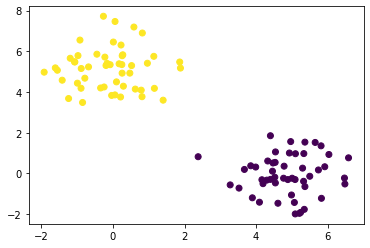

In [43]:
X, y = make_blobs([50, 50], n_features=2, centers=[(5, 0), (0, 5)], random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

X, y = pd.DataFrame(data=X), pd.DataFrame(data=y, columns=["target"])
evaluate(X, y)

F1 measure: 4.1080e-01
F2 measure: 1.1616e-01

KNN classifier accuracy: 0.9143


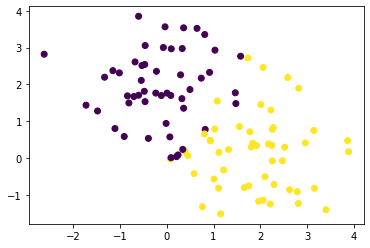

In [44]:
X, y = make_blobs([50, 50], n_features=2, centers=[(0, 2), (2, 0)], random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

X, y = pd.DataFrame(data=X), pd.DataFrame(data=y, columns=["target"])
evaluate(X, y)

F1 measure: 7.2841e-01
F2 measure: 3.8519e-01

KNN classifier accuracy: 0.7143


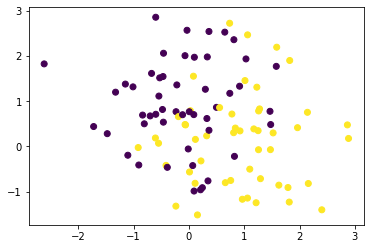

In [45]:
X, y = make_blobs([50, 50], n_features=2, centers=[(0, 1), (1, 0)], random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

X, y = pd.DataFrame(data=X), pd.DataFrame(data=y, columns=["target"])
evaluate(X, y)

F1 measure: 9.8862e-01
F2 measure: 5.5524e-01

KNN classifier accuracy: 0.5857


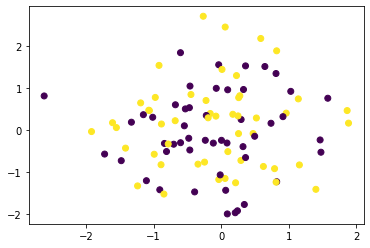

In [46]:
X, y = make_blobs([50, 50], n_features=2, centers=[(0, 0), (0, 0)], random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

X, y = pd.DataFrame(data=X), pd.DataFrame(data=y, columns=["target"])
evaluate(X, y)

## Real world datasets
To show that our algorithms work with real-world problems we compute F1 and F2 on 5 datasets. They have been chosen according to: [Napierala, K., Stefanowski, J. Types of minority class examples and their influence on learning classifiers from imbalanced data.](https://link.springer.com/article/10.1007/s10844-015-0368-1)

- "Easy" dataset - dataset claimed to be a safe one and thus should have relatively low F1 and F2 measures:
    - Statlog (Landsat Satellite)
- "Medium" datasets - datasets that contain many instances near border between classes. May be referred as noisy ones. Should result in high F1 and F2:
    - Ionosphere
    - Ecoli evaluation
    - Haberman's survival
- "Rare" datasets - dataset with high overlapping but high values range, thus should result in high F1 and low F2:
    - Breast Cancer Wisconsin (Diagnostic)

#### Statlog (Landsat Satellite)
The dataset is available here: [https://archive.ics.uci.edu/ml/datasets/Statlog+(Landsat+Satellite)](https://archive.ics.uci.edu/ml/datasets/Statlog+(Landsat+Satellite))

In [47]:
df = pd.read_csv('static/sat.tst', delim_whitespace=True, header=None)
X, y = df.iloc[:, :36], pd.DataFrame({'target': df.iloc[:, 36]})

evaluate(X, y)

F1 measure: 2.0795e-01
F2 measure: 3.8694e-06

KNN classifier accuracy: 0.8564


#### Ionosphere
The dataset is available here: [https://archive.ics.uci.edu/ml/datasets/ionosphere](https://archive.ics.uci.edu/ml/datasets/ionosphere)

In [48]:
df = pd.read_csv('static/ionosphere.data', header=None)
X, y = df.iloc[:, 1:34].drop(1, axis=1), pd.DataFrame({'target': df.iloc[:, 34].map({'b': 0, 'g': 1})})

evaluate(X, y)

F1 measure: 7.3049e-01
F2 measure: 4.3405e-02

KNN classifier accuracy: 0.8333


#### Ecoli evaluation
The dataset is available here: [https://archive.ics.uci.edu/ml/datasets/ecoli](https://archive.ics.uci.edu/ml/datasets/ecoli)

In [49]:
df = pd.read_csv('static/ecoli.data', header=None, delim_whitespace=True)
X = df.iloc[:, :8].drop([0, 3, 4], axis=1)
y = pd.DataFrame({'target': df.iloc[:, 8].apply(lambda x: x[:2]).map({'cp': 0, 'im': 1, 'om': 2, 'pp': 3})})

evaluate(X, y)

F1 measure: 2.1127e-01
F2 measure: 3.0882e-02

KNN classifier accuracy: 0.9280


#### Haberman's survival
The dataset is available here: [https://archive.ics.uci.edu/ml/datasets/haberman's+survival](https://archive.ics.uci.edu/ml/datasets/haberman's+survival)

This is most difficult example according to Napierala, K., Stefanowski, J. Computations below prove this - F1 and F2 are high. On the other hand KNN accuracy is low.

In [50]:
df = pd.read_csv('static/haberman.data', header=None)
X, y = df.iloc[:, :3], pd.DataFrame({'target': df.iloc[:, 3]})

evaluate(X, y)

F1 measure: 9.1776e-01
F2 measure: 7.1771e-01

KNN classifier accuracy: 0.7535


Now we consider a dataset, that according to Napierala, K., Stefanowski, J. is unsafe and there are many rare values. For this dataset the F2 measure is computed using high nominator (area of the overlapping) and high denominator (area computed using whole range of values) and thus the final score is low, because the denominator is very high and high overlapping doesn't compensate it.

#### Breast Cancer Wisconsin (Diagnostic)
The dataset is available here: [https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic))

In [51]:
df = pd.read_csv('static/wdbc.data', header=None)
X, y = df.iloc[:, 2:], pd.DataFrame({'target': df.iloc[:, 1].map({'B': 0, 'M': 1})})

evaluate(X, y)

F1 measure: 3.7025e-01
F2 measure: 5.6831e-11

KNN classifier accuracy: 0.9373
